In [4]:
import matplotlib.pyplot as plt
import cv2
import os
from glob import glob
import re
import scipy.misc
import numpy as np
import random
import time


Example of road pixel value at (150,300) [0 0 0]
Example of car pixel value at (120, 50) [0 0 0]
Exampl of none pixel value at (100,500) [0 0 0]


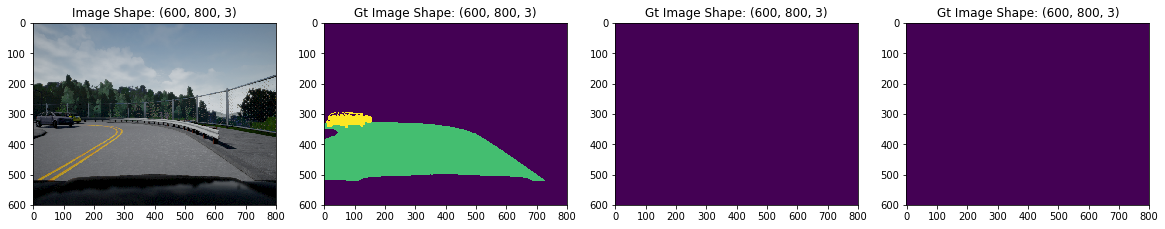

In [5]:
IMAGE_SHAPE = (800,600)

# Directories to ground truth labels and images
gt_dataset_dir = 'data/lyft_data/CameraSegProcessed/'
train_dataset_dir = 'data/lyft_data/CameraRGB/'

# Values can be found in the red channel [:,:,0]
test_gt_im = cv2.cvtColor(cv2.imread(os.path.join(gt_dataset_dir,'90.png')), cv2.COLOR_BGR2RGB)
test_gt_im = cv2.resize(test_gt_im, IMAGE_SHAPE)

test_im = cv2.cvtColor(cv2.imread(os.path.join(train_dataset_dir,'90.png')), cv2.COLOR_BGR2RGB)
test_im = cv2.resize(test_im, IMAGE_SHAPE)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.set_title('Image Shape: '+str(test_im.shape))
ax1.imshow(test_im)

ax2.set_title('Gt Image Shape: '+str(test_gt_im.shape))
ax2.imshow(test_gt_im[:,:,0])

ax3.set_title('Gt Image Shape: '+str(test_gt_im.shape))
ax3.imshow(test_gt_im[:,:,1])

ax4.set_title('Gt Image Shape: '+str(test_gt_im.shape))
ax4.imshow(test_gt_im[:,:,2])

print('Example of road pixel value at (150,300)', test_gt_im[150,300])
# Car label is 10 unnormalized
print('Example of car pixel value at (120, 50)', test_gt_im[120,50])
# None label is 0 unnormaliized
print('Exampl of none pixel value at (100,500)', test_gt_im[100,500])

In [6]:
def gen_batch_function(data_folder, image_shape):
    """
    Generate function to create batches of training data
    :param data_folder: Path to folder that contains all the datasets
    :param image_shape: Tuple - Shape of image
    :return:
    """
    train_dataset_dir = 'data/lyft_data/CameraRGB/'
    gt_dataset_dir = 'data/lyft_data/CameraSegProcessed/'
    
    def get_batches_fn(batch_size):
        """
        Create batches of training data
        :param batch_size: Batch Size
        :return: Batches of training data
        """
        image_paths = os.listdir(train_dataset_dir)
        
        vh_color = np.array([10, 0, 0])
        rd_color = np.array([7, 0, 0])
        bg_color = np.array([0, 0, 0])

        random.shuffle(image_paths)
        for batch_i in range(0, len(image_paths), batch_size):
            images = []
            gt_images = []
            for image_file in image_paths[batch_i:batch_i+batch_size]:
                
                img_dir = os.path.join(train_dataset_dir,image_file)
                gt_dir = os.path.join(gt_dataset_dir,image_file)
                
                image = cv2.resize(cv2.cvtColor(cv2.imread(img_dir),cv2.COLOR_BGR2RGB),image_shape)
                gt_image = cv2.resize(cv2.cvtColor(cv2.imread(gt_dir),cv2.COLOR_BGR2RGB),image_shape)
                
                gt_bg = np.all(gt_image == bg_color, axis=2)
                gt_bg = gt_bg.reshape(*gt_bg.shape, 1)
                
                gt_vh = np.all(gt_image == vh_color, axis=2)
                gt_vh = gt_vh.reshape(*gt_vh.shape, 1)
                
                gt_rd = np.all(gt_image == rd_color, axis=2)
                gt_rd = gt_rd.reshape(*gt_rd.shape, 1)
                
                
                gt_image = np.dstack((gt_rd, gt_vh)).astype(np.uint8)

                images.append(image)
                gt_images.append(gt_image)

            yield np.array(images), np.array(gt_images)
    return get_batches_fn

In [7]:
get_batches_fn = gen_batch_function(data_folder='data/lyft_data/CameraRGB/', image_shape=IMAGE_SHAPE)

(array([  0,   0,   0, ..., 599, 599, 599], dtype=int64), array([  0,   1,   2, ..., 797, 798, 799], dtype=int64))
0


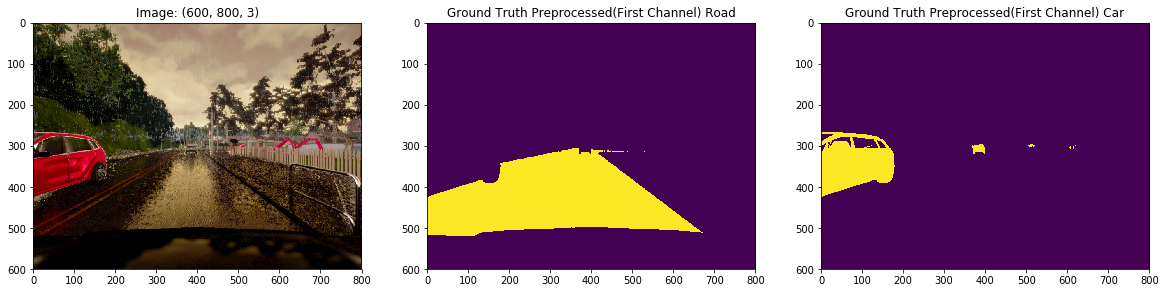

In [8]:
new_im, new_gt = next(get_batches_fn(1))

new_im = new_im[0]
new_gt = new_gt[0]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('Image: '+str(new_im.shape))
ax1.imshow(new_im)
ax2.set_title('Ground Truth Preprocessed(First Channel) Road')
ax2.imshow(new_gt[:,:,0])
ax3.set_title('Ground Truth Preprocessed(First Channel) Car')
ax3.imshow(new_gt[:,:,1])
# ax4.set_title('Ground Truth Preprocessed(First Channel) None')
# ax4.imshow(new_gt[:,:,2])

print(np.where(np.logical_or(new_gt[:,:,0]!=0,new_gt[:,:,0]!=1)))
print(new_gt[0,0,0])

# Timing and How Images are Read

In [ ]:
# Directories to ground truth labels and images
gt_dataset_dir = 'data/lyft_data/CameraSegNewProcessed/'
train_dataset_dir = 'data/lyft_data/CameraRGB/'
chosen_img = '90.png'

IMAGE_SHAPE


In [ ]:
times = []
# Reading in images
start_sci = time.time()
test_gt_im_sci = scipy.misc.imread(os.path.join(train_dataset_dir,chosen_img))
time_sci = time.time()-start_sci
times.append(time_sci)
print('Sci Read time', time_sci)

start_plt = time.time()
test_gt_im_plt = plt.imread(os.path.join(train_dataset_dir,chosen_img))
time_plt = time.time()-start_plt
times.append(time_plt)
print('Plt Read time', time_plt)

start_cv2 = time.time()
test_gt_im_cv2 = cv2.imread(os.path.join(train_dataset_dir,chosen_img))
test_gt_im_cv2 = cv2.cvtColor(test_gt_im_cv2, cv2.COLOR_BGR2RGB)
time_cv2 = time.time()-start_cv2
times.append(time_cv2)
print('Cv2 Read time', time_cv2)
print()
print('Cv2 is the fastest', min(times))

In [ ]:
print('CV2 Image, RGB, First Channel, 5x5 \n')
print(test_gt_im_cv2[0:5,0:5,0], '\n')

print('SCIPY Image, RGB, First Channel, 5x5 \n')
print(test_gt_im_sci[0:5,0:5,0],'\n')

print('PLT Image, RGB, First Channel, 5x5 \n')
print(test_gt_im_plt[0:5,0:5,0],'\n')

In [ ]:
times = []
# Reading in images
start_sci = time.time()
test_gt_im_sci = scipy.misc.imresize(test_gt_im_sci, (600,800))
time_sci = time.time()-start_sci
times.append(time_sci)
print('Sci Read time', time_sci)

start_cv2 = time.time()
test_gt_im_cv2 = cv2.resize(test_gt_im_cv2, (800,600))
time_cv2 = time.time()-start_cv2
times.append(time_cv2)
print('Cv2 Read time', time_cv2)
print()
print('Cv2 is the fastest', min(times))

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(test_gt_im_cv2)
ax2.imshow(test_gt_im_sci)